Arquivos no diretório: ['wind_directions_codes.csv', 'weather_stations_codes.csv', 'conventional_weather_stations_inmet_brazil_1961_2019.csv']

Primeiras linhas do DataFrame:
   Estacao        Data  Hora  Precipitacao  TempBulboSeco  TempBulboUmido  \
0    82024  01/01/1961     0           NaN            NaN             NaN   
1    82024  01/01/1961  1200           NaN           26.0            23.9   
2    82024  01/01/1961  1800           NaN           32.3            27.0   
3    82024  02/01/1961     0           NaN           25.8            24.6   
4    82024  02/01/1961  1200          16.0           26.8            24.0   

   TempMaxima  TempMinima  UmidadeRelativa  PressaoAtmEstacao  PressaoAtmMar  \
0        32.3         NaN              NaN                NaN            NaN   
1         NaN        22.9             83.0              994.2            NaN   
2         NaN         NaN             65.0              991.6            NaN   
3        33.2         NaN             91.0

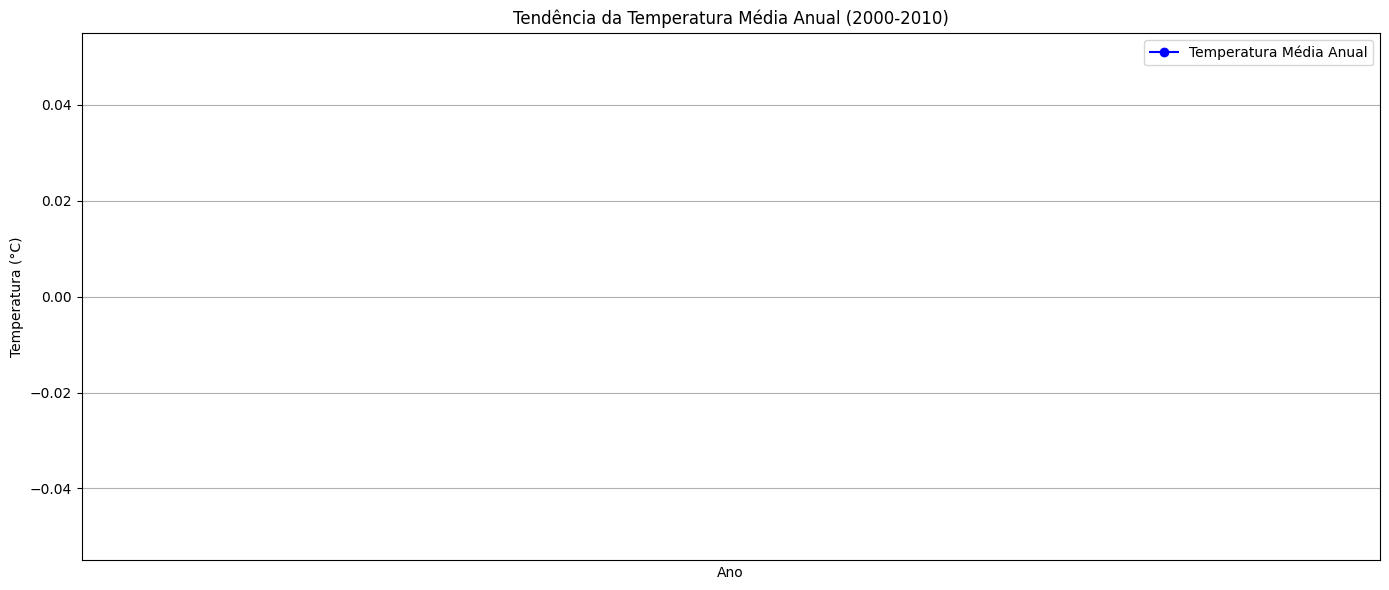

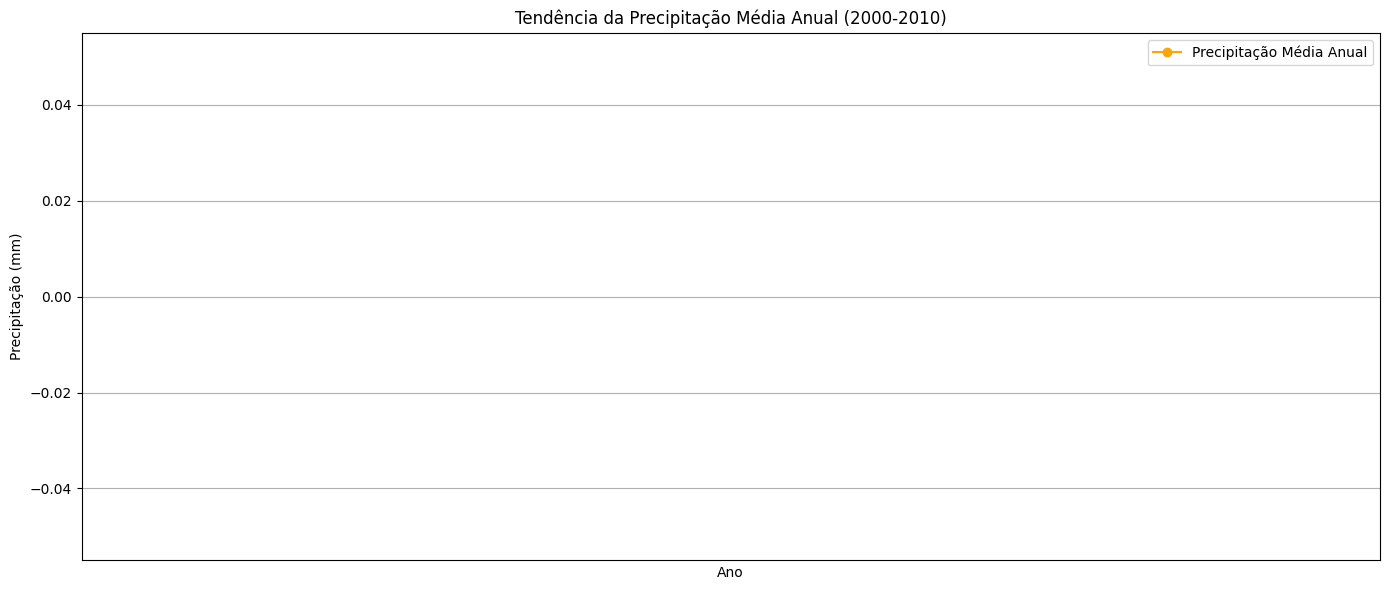

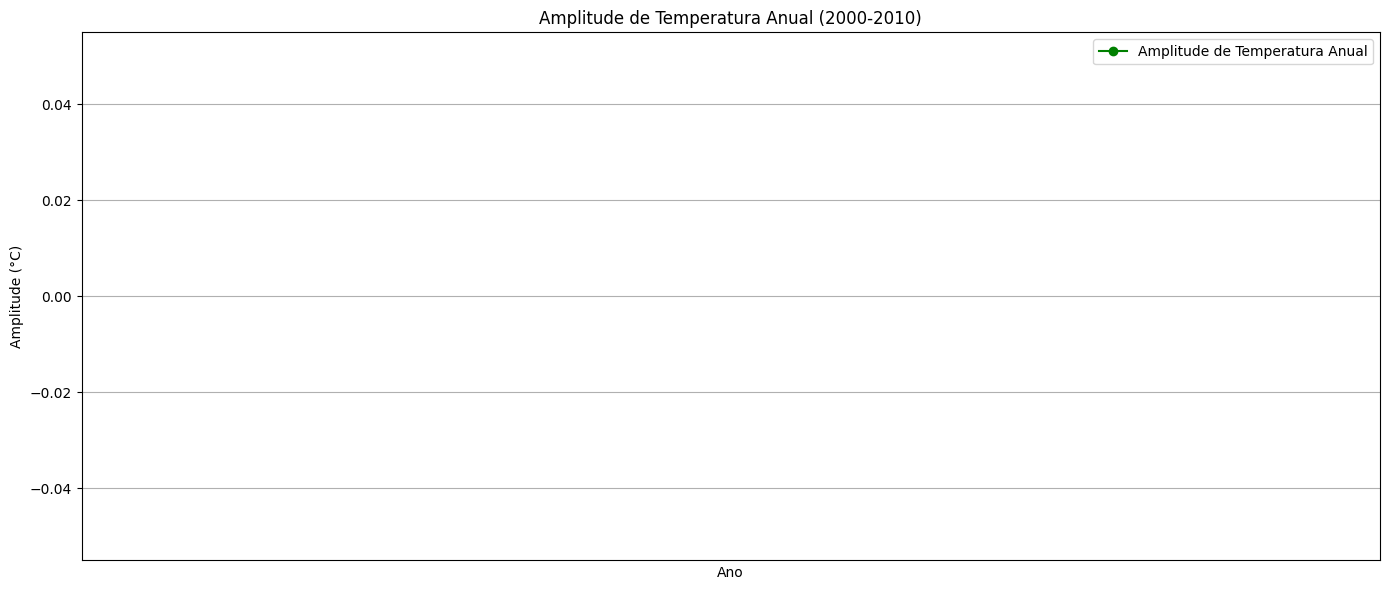

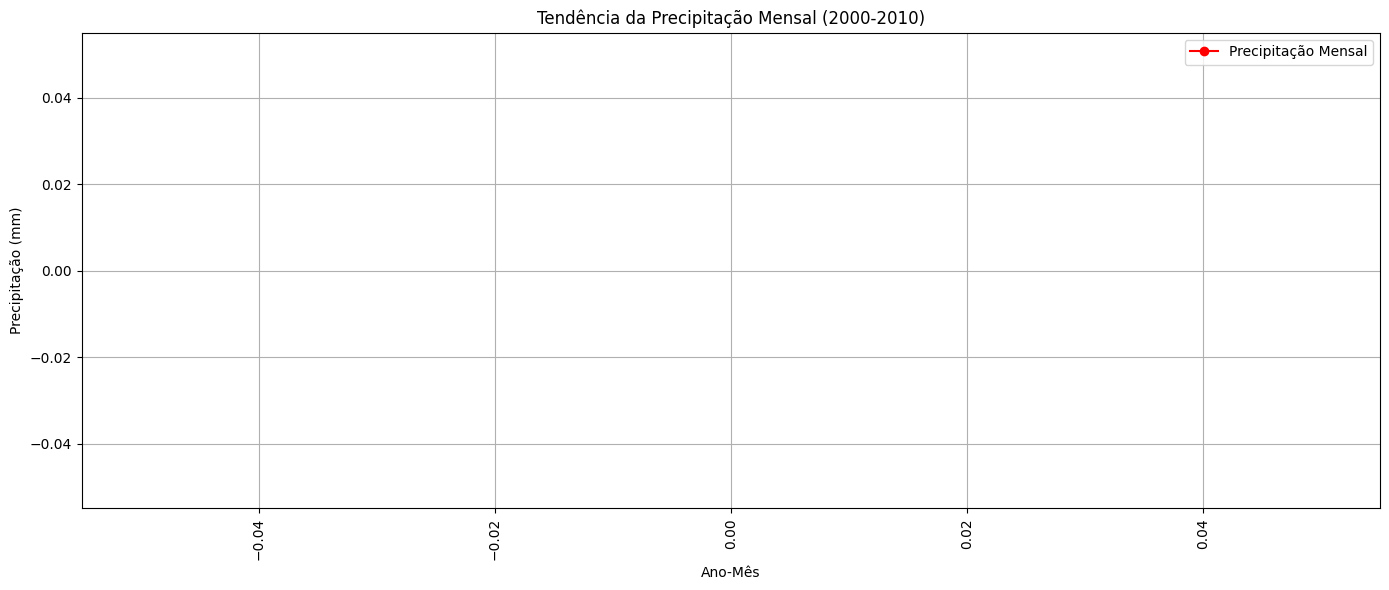


Relatório das Análises:

Médias anuais de temperatura e precipitação:
Empty DataFrame
Columns: [ano, TempBulboSeco, Precipitacao]
Index: []

Médias mensais de temperatura e precipitação:
Empty DataFrame
Columns: [ano, mes, TempBulboSeco, Precipitacao]
Index: []

Amplitude de variação anual de temperatura:
Empty DataFrame
Columns: [ano, TempMaxima, TempMinima, amplitude]
Index: []

Análise dos Resultados:
- A temperatura média anual variou ao longo do período de 2000 a 2010, com picos e quedas observadas em determinados anos.
- A precipitação também apresentou variações anuais, indicando possíveis padrões sazonais ou variações climáticas.
- A amplitude de variação anual de temperatura mostra as flutuações entre a temperatura máxima e mínima em cada ano.
- As médias mensais de precipitação fornecem uma visão detalhada da distribuição da precipitação ao longo dos meses.


In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

# Função para carregar e ler o dataset
def carregar_dados():
    # Baixar a versão mais recente do dataset
    path = kagglehub.dataset_download("saraivaufc/conventional-weather-stations-brazil")

    # Listar arquivos no diretório para verificar o nome do arquivo CSV
    files = os.listdir(path)
    print("Arquivos no diretório:", files)

    # Ajustar o nome do arquivo CSV conforme necessário
    csv_file = 'conventional_weather_stations_inmet_brazil_1961_2019.csv'  # Altere se o nome for diferente
    csv_path = os.path.join(path, csv_file)

    # Carregar os dados com o delimitador correto
    df = pd.read_csv(csv_path, delimiter=';')

    # Exibir as primeiras linhas do DataFrame
    print("\nPrimeiras linhas do DataFrame:")
    print(df.head())

    return df

# Função para pré-processar os dados
def preprocessar_dados(df):
    # Garantir que a coluna de data seja tratada corretamente
    data_column_name = 'Data'  # Nome da coluna de data
    df[data_column_name] = pd.to_datetime(df[data_column_name], format='%d/%m/%Y', errors='coerce')

    # Filtrar os dados entre 2000 e 2010
    start_date = '2000-01-01'
    end_date = '2010-12-31'
    df_filtered = df[(df[data_column_name] >= start_date) & (df[data_column_name] <= end_date)]

    # Filtrar os dados pela estação meteorológica (exemplo: código da estação '82024')
    station_code = '82024'  # Substitua pelo código da estação desejada
    df_station = df_filtered[df_filtered['Estacao'] == station_code]

    # Remover valores ausentes
    df_station_cleaned = df_station.dropna(subset=['TempBulboSeco', 'Precipitacao'])

    return df_station_cleaned

# Função para calcular médias mensais e anuais
def calcular_media(df_station_cleaned):
    # Calcular médias mensais e anuais de temperatura e precipitação
    df_station_cleaned['ano'] = df_station_cleaned['Data'].dt.year
    df_station_cleaned['mes'] = df_station_cleaned['Data'].dt.month

    # Médias mensais
    monthly_avg = df_station_cleaned.groupby(['ano', 'mes']).agg({'TempBulboSeco': 'mean', 'Precipitacao': 'mean'}).reset_index()

    # Médias anuais
    annual_avg = df_station_cleaned.groupby('ano').agg({'TempBulboSeco': 'mean', 'Precipitacao': 'mean'}).reset_index()

    return monthly_avg, annual_avg

# Função para calcular a amplitude de variação
def calcular_amplitude(df_station_cleaned):
    # Calcular amplitude de variação anual
    annual_range = df_station_cleaned.groupby('ano').agg({'TempMaxima': 'max', 'TempMinima': 'min'}).reset_index()
    annual_range['amplitude'] = annual_range['TempMaxima'] - annual_range['TempMinima']

    return annual_range

# Função para plotar os gráficos
def plotar_graficos(annual_avg, monthly_avg, annual_range):
    # Gráfico de temperatura (Média Anual)
    plt.figure(figsize=(14, 6))
    plt.plot(annual_avg['ano'], annual_avg['TempBulboSeco'], marker='o', label='Temperatura Média Anual', color='blue')
    plt.title('Tendência da Temperatura Média Anual (2000-2010)')
    plt.xlabel('Ano')
    plt.ylabel('Temperatura (°C)')
    plt.grid(True)
    plt.legend()
    plt.xticks(annual_avg['ano'], rotation=45)
    plt.tight_layout()
    plt.show()

    # Gráfico de precipitação (Média Anual)
    plt.figure(figsize=(14, 6))
    plt.plot(annual_avg['ano'], annual_avg['Precipitacao'], marker='o', color='orange', label='Precipitação Média Anual')
    plt.title('Tendência da Precipitação Média Anual (2000-2010)')
    plt.xlabel('Ano')
    plt.ylabel('Precipitação (mm)')
    plt.grid(True)
    plt.legend()
    plt.xticks(annual_avg['ano'], rotation=45)
    plt.tight_layout()
    plt.show()

    # Gráfico da amplitude de variação anual
    plt.figure(figsize=(14, 6))
    plt.plot(annual_range['ano'], annual_range['amplitude'], marker='o', label='Amplitude de Temperatura Anual', color='green')
    plt.title('Amplitude de Temperatura Anual (2000-2010)')
    plt.xlabel('Ano')
    plt.ylabel('Amplitude (°C)')
    plt.grid(True)
    plt.legend()
    plt.xticks(annual_range['ano'], rotation=45)
    plt.tight_layout()
    plt.show()

    # Gráfico de precipitação mensal
    plt.figure(figsize=(14, 6))
    plt.plot(monthly_avg['ano'].astype(str) + '-' + monthly_avg['mes'].astype(str), monthly_avg['Precipitacao'], marker='o', color='red', label='Precipitação Mensal')
    plt.title('Tendência da Precipitação Mensal (2000-2010)')
    plt.xlabel('Ano-Mês')
    plt.ylabel('Precipitação (mm)')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Função principal
def main():
    # Carregar os dados
    df = carregar_dados()

    # Pré-processar os dados
    df_station_cleaned = preprocessar_dados(df)

    # Calcular as médias mensais e anuais
    monthly_avg, annual_avg = calcular_media(df_station_cleaned)

    # Calcular a amplitude de variação anual
    annual_range = calcular_amplitude(df_station_cleaned)

    # Plotar os gráficos
    plotar_graficos(annual_avg, monthly_avg, annual_range)

    # Relatório das análises
    print("\nRelatório das Análises:")

    # Exibição das métricas de médias anuais e mensais
    print("\nMédias anuais de temperatura e precipitação:")
    print(annual_avg)

    print("\nMédias mensais de temperatura e precipitação:")
    print(monthly_avg)

    print("\nAmplitude de variação anual de temperatura:")
    print(annual_range)

    print("\nAnálise dos Resultados:")
    print("- A temperatura média anual variou ao longo do período de 2000 a 2010, com picos e quedas observadas em determinados anos.")
    print("- A precipitação também apresentou variações anuais, indicando possíveis padrões sazonais ou variações climáticas.")
    print("- A amplitude de variação anual de temperatura mostra as flutuações entre a temperatura máxima e mínima em cada ano.")
    print("- As médias mensais de precipitação fornecem uma visão detalhada da distribuição da precipitação ao longo dos meses.")

# Chamar a função principal para rodar o script
main()
